In [1]:
import UtilStock
import datapreprocess
import pymssql as mssql

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, LSTM, Conv1D, TimeDistributed, Dropout
from tensorflow.keras.layers import LeakyReLU

In [3]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:

#data params
train_ratio = 0.7

# Convolution
kernel_size = 3
filters = 64
pool_size = 2

feature_num = 19
sample_size = 500
date_size = 5


In [5]:
# 트레인 테스트 데이터 생성
server, user, password, database = UtilStock.ParseConfig('config.ini')
connect = mssql.connect(server=server, user=user, password=password, database=database, charset='UTF8')
cur = connect.cursor()
info = UtilStock.LoadStockInfo(cur)
data, label = datapreprocess.getFinanceInfoLabelto2DArray(cur, info, data_size= sample_size, date_size= date_size, scaler=True)


ATA_WEEK 279060    
sql: SEL_STOCK_TRAINING_DATA_WEEK 030210    
sql: SEL_STOCK_TRAINING_DATA_WEEK 038680    
sql: SEL_STOCK_TRAINING_DATA_WEEK 170920    
sql: SEL_STOCK_TRAINING_DATA_WEEK 101170    
sql: SEL_STOCK_TRAINING_DATA_WEEK 122870    
sql: SEL_STOCK_TRAINING_DATA_WEEK 000490    
sql: SEL_STOCK_TRAINING_DATA_WEEK 126880    
sql: SEL_STOCK_TRAINING_DATA_WEEK 214150    
sql: SEL_STOCK_TRAINING_DATA_WEEK 033790    
sql: SEL_STOCK_TRAINING_DATA_WEEK 017550    
sql: SEL_STOCK_TRAINING_DATA_WEEK 066130    
sql: SEL_STOCK_TRAINING_DATA_WEEK 028050    
sql: SEL_STOCK_TRAINING_DATA_WEEK 064510    
sql: SEL_STOCK_TRAINING_DATA_WEEK 027710    
sql: SEL_STOCK_TRAINING_DATA_WEEK 136480    
sql: SEL_STOCK_TRAINING_DATA_WEEK 007460    
sql: SEL_STOCK_TRAINING_DATA_WEEK 097800    
sql: SEL_STOCK_TRAINING_DATA_WEEK 036170    
sql: SEL_STOCK_TRAINING_DATA_WEEK 067170    
sql: SEL_STOCK_TRAINING_DATA_WEEK 208370    
sql: SEL_STOCK_TRAINING_DATA_WEEK 089140    
sql: SEL_STOCK_TRAINING_DATA_WEEK 2

In [7]:
data.shape

(19084, 5, 19)

In [8]:
train_Data = data[ 0 : int(len(data) * train_ratio)]
train_Label = label[ 0 : int(len(data) * train_ratio)]

test_Data = data[int(len(data) * train_ratio) : len(data)]
test_Label = label[int(len(data) * train_ratio) : len(data)]

In [9]:

model = Sequential()
#model.add(LSTM(4, activation='tanh', input_shape=(date_size,feature_num)))
model.add(LSTM(50, return_sequences=True, input_shape=(date_size, feature_num)))
model.add(LSTM(64, return_sequences=False))
#model.add(Dropout(0, 2))
#model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

print('Model Build...')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model Build...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             14000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 43,505
Trainable params: 43,505
Non-trainable params: 0
_________________________________________________________________


Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13358 samples, validate on 5726 samples
Epoch 1/100
13358/13358 - 17s - loss: 0.0225 - acc: 0.0165 - val_loss: 0.0027 - val_acc: 0.0236
Epoch 2/100
13358/13358 - 8s - loss: 0.0030 - acc: 0.0171 - val_loss: 0.0026 - val_acc: 0.0236
Epoch 3/100
13358/13358 - 8s - loss: 0.0029 - acc: 0.0171 - val_loss: 0.0025 - val_acc: 0.0236
Epoch 4/100
13358/13358 - 9s - loss: 0.0029 - acc: 0.0171 - val_loss: 0.0025 - val_acc: 0.0236
Epoch 5/100
13358/13358 - 15s - loss: 0.0029 - acc: 0.0171 - val_loss: 0.0027 - val_acc: 0.0236
Epoch 6/100
13358/13358 - 9s - loss: 0.0029 - acc: 0.0171 - val_loss: 0.0025 - val_acc: 0.0236
Epoch 7/100
13358/13358 - 9s - loss: 0.0028 - acc: 0.0171 - val_loss: 0.0025 - val_acc: 0.0236
Epoch 8/100
13358/13358 - 10s - loss: 0.0028 - acc: 0.0171 - val_loss: 0.0026 - val_acc: 0.0236
Epoch 9/100
13358/13358 - 10s - loss: 0.0028 - acc: 0.0171 - val_loss: 0.0025 - val_a

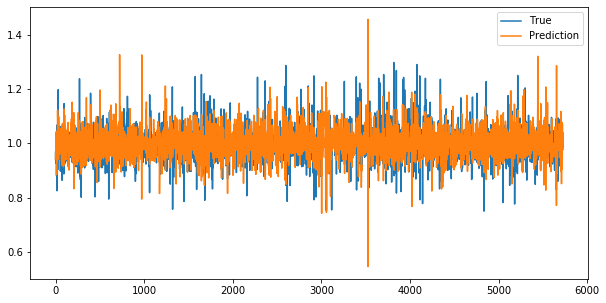

"\nscore, acc = model.evaluate(test_Data, test_Label)\nprint('Test score:', score)\nprint('Test accuracy:', acc)\n"

In [10]:

print('Train...')
model.fit(train_Data, train_Label,
            epochs=100,
            batch_size=32, verbose=2,
            validation_data=(test_Data, test_Label))

testPredict = model.predict(test_Data)
testScore = math.sqrt(mean_squared_error(test_Label, testPredict))
print('Train Score: %.2f RMSE' % testScore)

fig = plt.figure(facecolor='white', figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(test_Label, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()
'''
score, acc = model.evaluate(test_Data, test_Label)
print('Test score:', score)
print('Test accuracy:', acc)
'''

Train Score: 0.06 RMSE


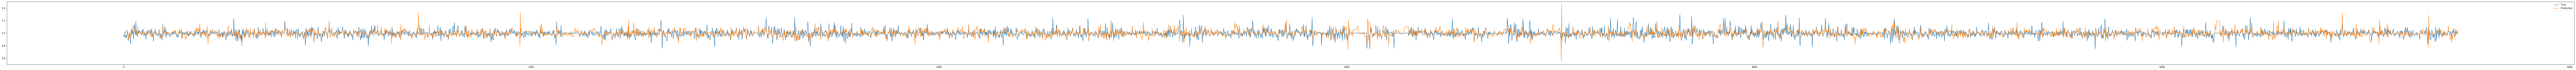

In [12]:
testPredict = model.predict(test_Data)
testScore = math.sqrt(mean_squared_error(test_Label, testPredict))
print('Train Score: %.2f RMSE' % testScore)

fig = plt.figure(facecolor='white', figsize=(200, 5))
ax = fig.add_subplot(111)
ax.plot(test_Label, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()

In [13]:
model.save('model02.h5')